In [3]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [4]:
df = pd.read_csv('/content/GOOG.csv') # data_importing

In [5]:
df.head(20) # fetching first 20 rows of dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.9800,717.3100,719.00,1214517,718.92,722.9800,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.6500,703.2600,714.91,1982471,710.36,716.6500,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.8200,688.4515,708.65,3402357,691.72,708.8200,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.4800,693.4100,698.77,2082538,693.71,702.4800,693.4100,698.77,2082538,0.0,1.0
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.7700,692.0100,698.40,1465634,695.94,702.7700,692.0100,698.40,1465634,0.0,1.0
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.8600,693.0819,699.06,1184318,697.46,700.8600,693.0819,699.06,1184318,0.0,1.0
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.9500,687.0000,697.45,2171415,701.87,701.9500,687.0000,697.45,2171415,0.0,1.0
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.4000,673.4500,675.17,4449022,675.22,689.4000,673.4500,675.17,4449022,0.0,1.0
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.3000,663.2840,671.00,2641085,668.26,672.3000,663.2840,671.00,2641085,0.0,1.0


In [6]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (1258, 14)


In [7]:
# statistical description of data
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [8]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [9]:
# checking null values
df.isnull().sum()

,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0


STEP 2 - Data Preprocessing

In [10]:
df = df[['date','open','close']] # Extracting required columns
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('date',drop=True,inplace=True) # Setting date column as index
df.head(20)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


STEP 3 - Data Visualization

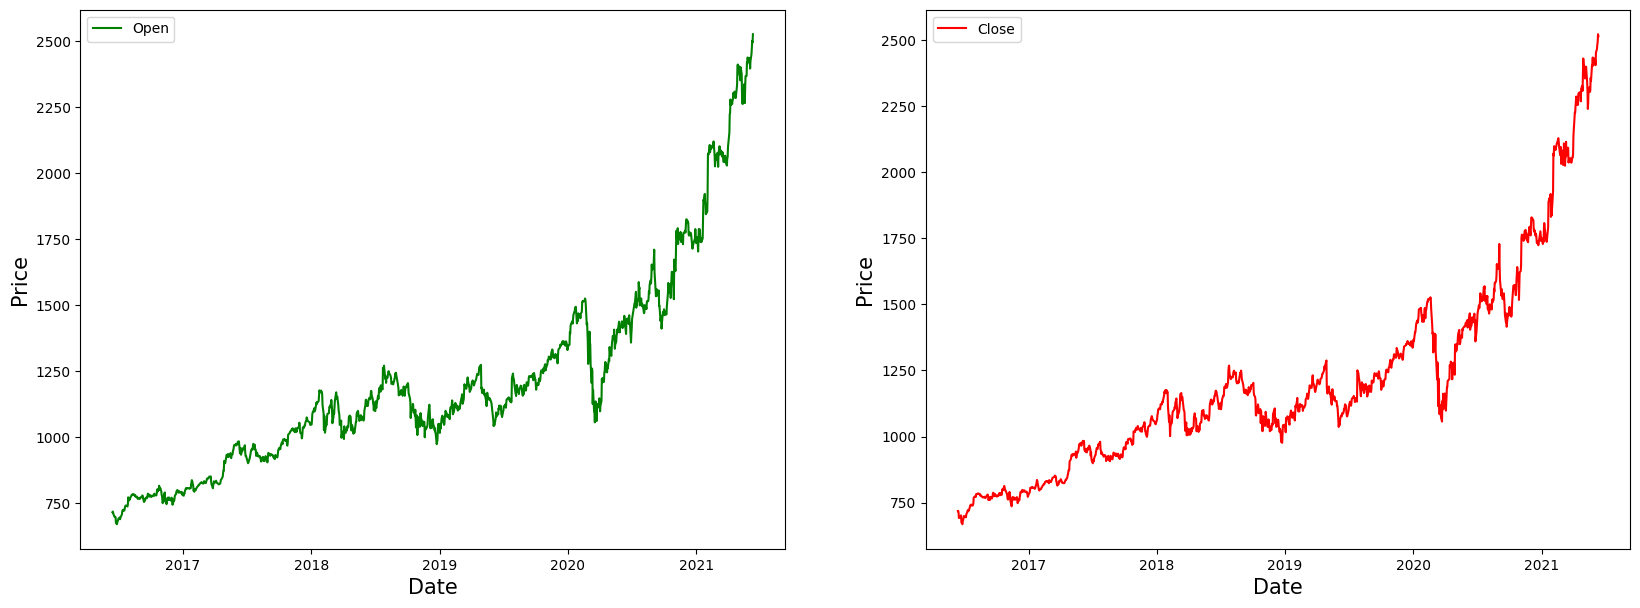

In [11]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [12]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(20)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


STEP 4 - Data Splitting and Sequencing

In [13]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [14]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [15]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [16]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

STEP 5 - Model Building and Training

In [17]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0199 - mean_absolute_error: 0.1083 - val_loss: 0.0126 - val_mean_absolute_error: 0.0934
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 8.8101e-04 - mean_absolute_error: 0.0240 - val_loss: 0.0037 - val_mean_absolute_error: 0.0478
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.8680e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0022 - val_mean_absolute_error: 0.0357
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.9939e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0034 - val_mean_absolute_error: 0.0470
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 4.2667e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0028 - val_mean_absolute_error: 0.0411
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.8011e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0019 - val_mean_absolute_error: 0.0334
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.5605e-04 - mean_ab

STEP 6 - Predictions and Visualization

In [19]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


array([[0.4012448 , 0.39732063],
       [0.4002663 , 0.39649034],
       [0.39522058, 0.39150876],
       [0.3989134 , 0.39500636],
       [0.4025298 , 0.3985234 ]], dtype=float32)

In [20]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1414.8757, 1404.6302],
       [1413.0616, 1403.0914],
       [1403.7074, 1393.8589],
       [1410.5535, 1400.3412],
       [1417.258 , 1406.8594]], dtype=float32)

In [21]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [22]:
# Inversing normalization/scaling
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1414.875732,1404.630249
2020-05-28,1396.86,1416.73,1413.061646,1403.091431
2020-05-29,1416.94,1428.92,1403.707397,1393.858887
2020-06-01,1418.39,1431.82,1410.553467,1400.341187
2020-06-02,1430.55,1439.22,1417.258057,1406.859375


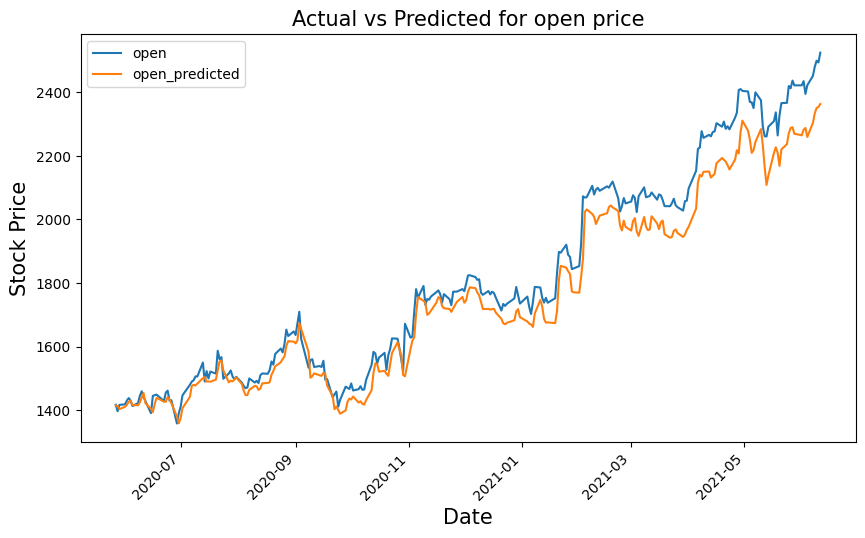

In [23]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

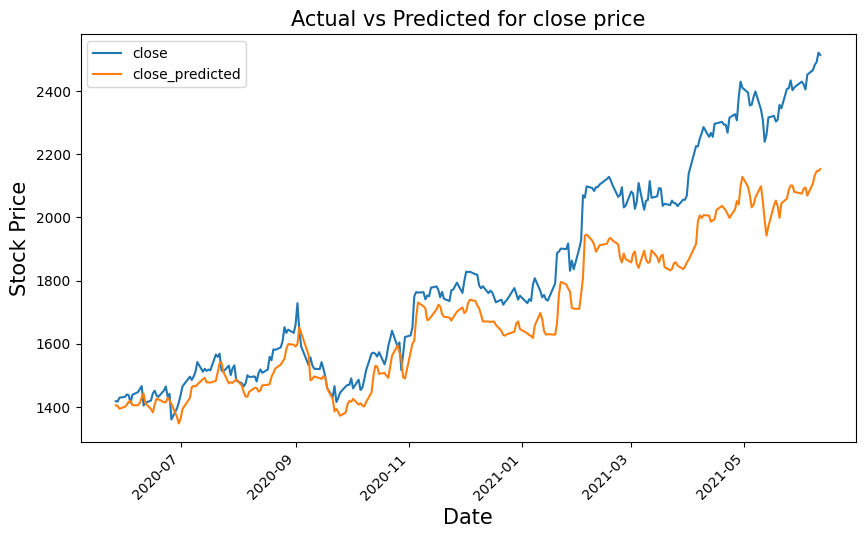

In [24]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

STEP 7 - Upcoming Price Prediction

In [25]:
# df_merge = pd.read_csv('Google Stocks.csv')

# Creating a new DataFrame to append 10 days of empty data
new_data = pd.DataFrame(index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D'))

# Appending the new_data to df_merge
df_merge = pd.concat([df_merge, new_data])

# Now you can select the specific date range
selected_date_range = df_merge['2021-06-09':'2021-06-28']
print(selected_date_range)

               open    close  open_predicted  close_predicted
2021-06-09  2499.50  2491.40     2350.711670      2146.115234
2021-06-10  2494.01  2521.60     2353.961670      2146.702637
2021-06-11  2524.92  2513.93     2363.278809      2152.930420
2021-06-11      NaN      NaN             NaN              NaN
2021-06-12      NaN      NaN             NaN              NaN
2021-06-13      NaN      NaN             NaN              NaN
2021-06-14      NaN      NaN             NaN              NaN
2021-06-15      NaN      NaN             NaN              NaN
2021-06-16      NaN      NaN             NaN              NaN
2021-06-17      NaN      NaN             NaN              NaN
2021-06-18      NaN      NaN             NaN              NaN
2021-06-19      NaN      NaN             NaN              NaN
2021-06-20      NaN      NaN             NaN              NaN
2021-06-21      NaN      NaN             NaN              NaN


In [26]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [27]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [28]:
# inversing Normalization/scaling
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

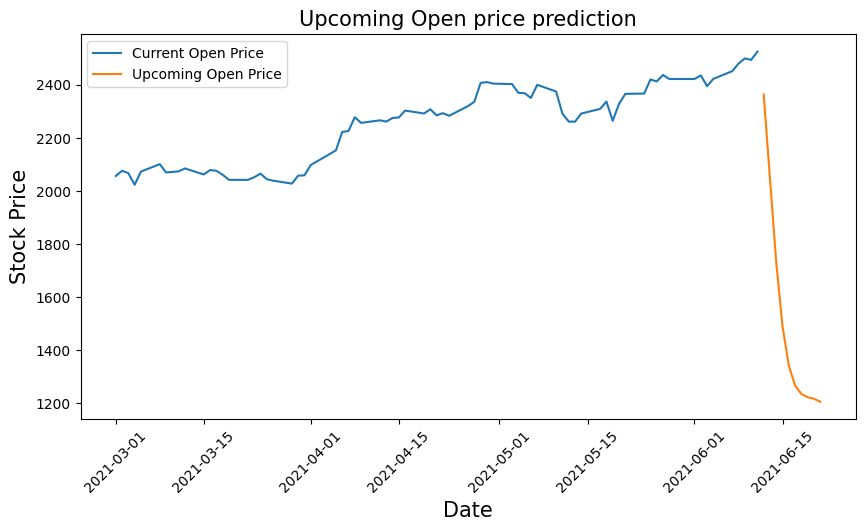

In [29]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-03-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

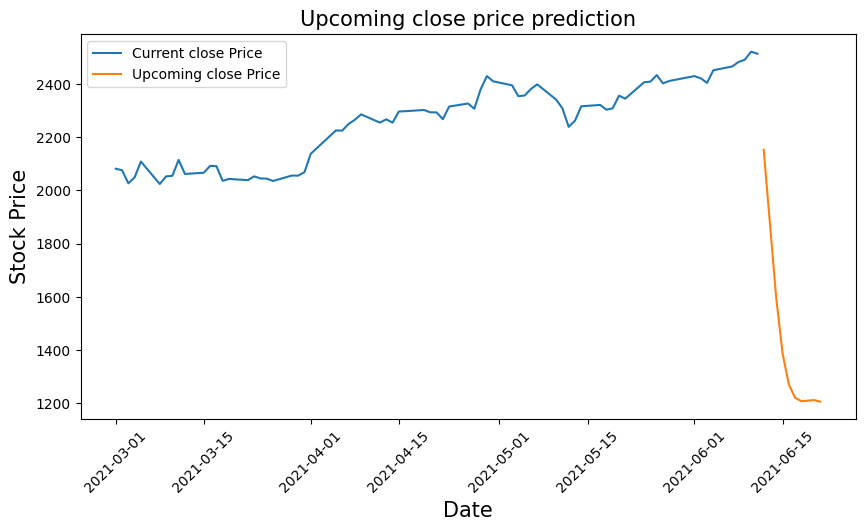

In [30]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-03-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

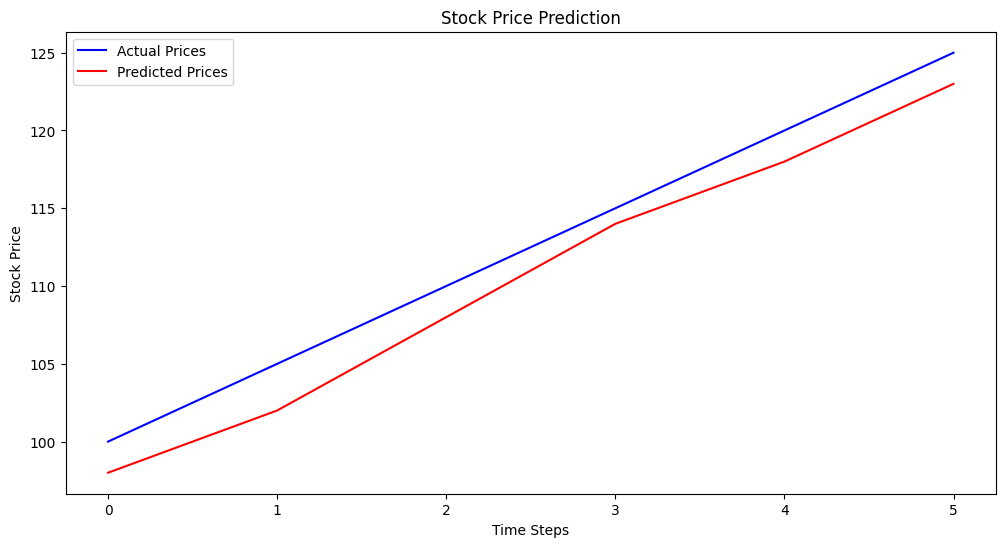

In [31]:
# Define actual stock prices (replace [...] with your actual data)
actual_prices = np.array([100, 105, 110, 115, 120, 125])  # Example actual prices

# Define predicted stock prices (replace [...] with your predicted data)
predictions = np.array([98, 102, 108, 114, 118, 123])  # Example predicted prices

# Plotting the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

In [32]:
# Data Preprocessing
# Handle missing values if needed
# Scale the data using MinMaxScaler

# Assuming 'close' column contains the stock prices
close_prices = data['close'].values.reshape(-1, 1)  # Reshape for MinMaxScaler

# Perform Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

NameError: name 'data' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load the data
file_path = '/content/GOOG.csv'  # Path to the uploaded file
data = pd.read_csv(file_path)

In [ ]:
# Check the column names
print(data.columns)

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')


In [ ]:
# Assuming 'Close' column contains the stock prices (case-sensitive)
if 'Close' in data.columns:
    close_prices = data['Close'].values.reshape(-1, 1)  # Reshape for MinMaxScaler

    # Perform Min-Max scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    close_prices_scaled = scaler.fit_transform(close_prices)

    print("Scaling successful")
else:
    print("Column 'Close' not found in the dataset. Check column names.")

Column 'Close' not found in the dataset. Check column names.
